#### The below code is adapted, modified and build upon from Youtube video "Unlock Open Multimodality with Phi-4" by Sam Witteveen
#### Original Source :  https://dripl.ink/Sr4Uk

#### Realtime part is mine, but the vqa_phi4 function is reused from above

In [1]:
!pip -q install torch==2.5.1
!pip -q install flash_attn==2.7.4.post1
!pip -q install transformers==4.48.2
!pip -q install accelerate==1.3.0
!pip -q install soundfile==0.13.1
!pip -q install pillow==11.1.0
!pip -q install scipy==1.15.2
!pip -q install torchvision==0.21.0
!pip -q install backoff==2.2.1
!pip -q install peft==0.13.2
!pip -q install hf_transfer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 102.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00


In [2]:
import requests
import torch
import os
import io
from PIL import Image
import soundfile as sf
from transformers import AutoModelForCausalLM, AutoProcessor, GenerationConfig
from IPython.display import display, Markdown

In [3]:
os.environ ['HF_HUB_ENABLE_HF_TRANSFER'] = '1'

In [4]:
# Load the model and processor
model_path = "microsoft/Phi-4-multimodal-instruct"


model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
    attn_implementation='flash_attention_2',
).cuda()

processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

configuration_phi4mm.py:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- configuration_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi4mm.py:   0%|          | 0.00/116k [00:00<?, ?B/s]

speech_conformer_encoder.py:   0%|          | 0.00/111k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


processing_phi4mm.py:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- processing_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vision_siglip_navit.py:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- vision_siglip_navit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- modeling_phi4mm.py
- speech_conformer_encoder.py
- processing_phi4mm.py
- vision_siglip_navit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/240k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-4-multimodal-instruct/985802b4e1db71df6d366368508d5b30bd743c42/speech_conformer_encoder.py:2775: FutureWarning: Please specify CheckpointImpl.NO_REENTRANT as CheckpointImpl.REENTRANT will soon be removed as the default and eventually deprecated.
  lambda i: encoder_checkpoint_wrapper(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.91M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

In [5]:
generation_config = GenerationConfig.from_pretrained(model_path)

In [6]:
!nvidia-smi

Sat Mar  8 13:04:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             53W /  400W |   11835MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [7]:
# prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

# # inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")
# inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")


In [8]:
generation_args = {
    "max_new_tokens": 512,
    "do_sample": False,
    # "temperature": 0.0,

}

In [9]:
# generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

# # remove input tokens
# generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
# response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]



In [10]:
# Markdown(response)

## Images

In [11]:
def vqa_phi4(image, prompt):
    messages = [
        {"role": "user", "content": f"<|image_1|>\n{prompt}"},
    ]
    prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    inputs = processor(text=prompt, images=[image], return_tensors="pt").to("cuda:0")

    generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

    # remove input tokens
    generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
    response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    print(response)
    return response


In [12]:
# img_path = "/content/planes_phi4.png"

# image = Image.open(img_path).convert("RGB")
# image

In [13]:
# prompt = "What is shown in this image?"

# vqa_phi4(image, prompt)

In [14]:
# prompt = "How many planes are there?"

# vqa_phi4(image, prompt)

In [15]:
# prompt = "Give me the bounding boxes for the planes"

# vqa_phi4(image, prompt)

In [16]:
# prompt = "what airport is it?"

# vqa_phi4(image, prompt)

## REALTIME - Single Shot

In [17]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless

Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86


In [18]:
# import IPython.display
# import time
# from google.colab import output
# from base64 import b64decode
# from datetime import datetime

# # JavaScript to capture image
# js_code = """
# async function captureImage() {
#     const video = document.createElement('video');
#     const canvas = document.createElement('canvas');
#     const context = canvas.getContext('2d');

#     // Get webcam access
#     const stream = await navigator.mediaDevices.getUserMedia({ video: true });
#     video.srcObject = stream;
#     await video.play();

#     // Set canvas size
#     canvas.width = video.videoWidth;
#     canvas.height = video.videoHeight;

#     // Capture image
#     context.drawImage(video, 0, 0, canvas.width, canvas.height);
#     stream.getTracks().forEach(track => track.stop());

#     // Convert image to base64
#     return canvas.toDataURL('image/jpeg');
# }

# async function mainLoop() {
#     while (true) {
#         const imgData = await captureImage();
#         google.colab.kernel.invokeFunction('notebook.capture_callback', [imgData], {});
#         await new Promise(resolve => setTimeout(resolve, 5000));
#     }
# }
# mainLoop();
# """

# # Function to save image
# def capture_callback(img_data):
#     img_data = img_data.split(",")[1]  # Remove header
#     img_bytes = b64decode(img_data)
#     filename = f"screenshot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.jpg"
#     with open(filename, "wb") as f:
#         f.write(img_bytes)
#     print(f"Saved: {filename}")

# # Register the function to handle captured images
# output.register_callback("notebook.capture_callback", capture_callback)

# # Display JavaScript UI
# IPython.display.display(IPython.display.Javascript(js_code))


In [19]:
# !pip install opencv-python-headless

# import cv2
# import time
# from PIL import Image
# from transformers import AutoModelForCausalLM, AutoProcessor

# # Load the Phi-4 model and processor
# model_path = "microsoft/Phi-4-multimodal-instruct"
# model = AutoModelForCausalLM.from_pretrained(model_path, device_map="cuda", torch_dtype="auto", trust_remote_code=True, attn_implementation='flash_attention_2').cuda()
# processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

# def vqa_phi4(image, prompt="Describe the image"):
#     messages = [{"role": "user", "content": f"<|image_1|>\n{prompt}"}]
#     prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

#     inputs = processor(text=prompt, images=[image], return_tensors="pt").to("cuda:0")

#     generation_args = {"max_new_tokens": 50}  # Adjust as needed
#     generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

#     # Remove input tokens
#     generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
#     response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

#     print("AI Response:", response)
#     return response

# # Initialize webcam
# # Try different camera indices if 0 doesn't work (e.g., 1, 2, etc.)
# cap = cv2.VideoCapture(0)

# # Check if camera opened successfully
# if not cap.isOpened():
#     print("Error opening video stream or file")
#     exit()

# # Capture image every 5 seconds
# try:
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             print("Failed to capture image")
#             break

#         # Convert frame (BGR) to RGB
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = Image.fromarray(image)  # Convert to PIL Image

#         # Process the image with Phi-4
#         vqa_phi4(image)

#         # Wait for 5 seconds
#         time.sleep(5)

# except KeyboardInterrupt:
#     print("Process interrupted by user")

# # Release resources
# cap.release()

In [20]:
# import cv2
# import time
# from PIL import Image

# # Initialize the camera
# camera = cv2.VideoCapture(0)  # Ensure this works in your environment

# if not camera.isOpened():
#     print("Error: Camera could not be accessed.")
# else:
#     print("Camera initialized successfully.")

# count = 0  # Counter for image filenames

# try:
#     while True:
#         ret, frame = camera.read()
#         if not ret:
#             print("Failed to capture image. Exiting...")
#             break

#         # Convert frame to a PIL Image
#         image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#         # Save image with sequential naming
#         filename = f"{count}.jpg"
#         image.save(filename)
#         print(f"Saved: {filename}")

#         count += 1  # Increment counter

#         # Wait for 5 seconds
#         time.sleep(5)

# except KeyboardInterrupt:
#     print("\nProcess interrupted by user.")

# finally:
#     camera.release()
#     cv2.destroyAllWindows()
#     print("Camera released. Program exited.")


Error: Camera could not be accessed.
Failed to capture image. Exiting...
Camera released. Program exited.


In [30]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io
import time

# JavaScript to capture image from the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      document.body.appendChild(div);
      const video = document.createElement('video');
      div.appendChild(video);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await new Promise((resolve) => video.onloadedmetadata = resolve);
      video.play();

      // Capture image after a short delay
      await new Promise((resolve) => setTimeout(resolve, 1000));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());

      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Test by capturing an image
photo_filename = take_photo("test.jpg")
print(f"Image saved as {photo_filename}")


<IPython.core.display.Javascript object>

Image saved as test.jpg


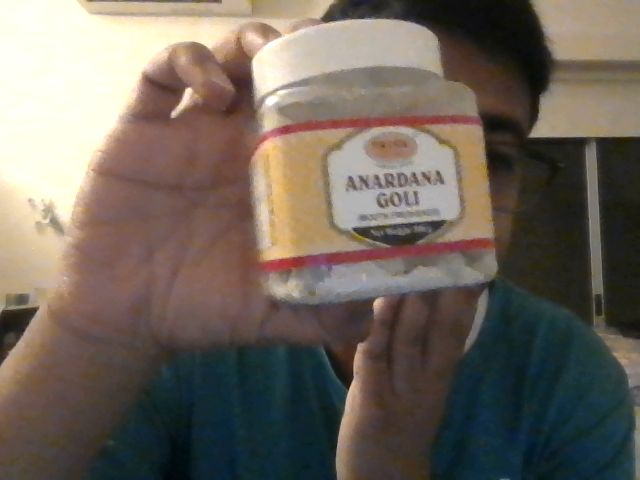

In [31]:
img_path = "/content/test.jpg"

image = Image.open(img_path).convert("RGB")
image

In [32]:
prompt = "What is shown in this image?"

vqa_phi4(image, prompt)

A person holding a jar of Anardana Goli.


'A person holding a jar of Anardana Goli.'

In [33]:
prompt = "Describe the person"

vqa_phi4(image, prompt)

The person is wearing a blue shirt and is holding a jar with both hands.


'The person is wearing a blue shirt and is holding a jar with both hands.'

In [34]:
prompt = "Describe the room"

vqa_phi4(image, prompt)

The room has a neutral color scheme with a white wall and a dark-colored cabinet in the background.


'The room has a neutral color scheme with a white wall and a dark-colored cabinet in the background.'